# Does ELMo know constructions?

In [78]:
import matplotlib.pyplot as plt

In [51]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # makes figs nicer!

In [1]:
from allennlp.commands.elmo import ElmoEmbedder

Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex.


In [2]:
elmo = ElmoEmbedder()

In [92]:
sentences = [['John kicked Jane the ball', 'DT', 'kick'],
             ['John tossed Jane the ball', 'DT', 'toss'],
             ['John threw Jane the ball', 'DT', 'throw'],
             ['John gave Jane the ball', 'DT', 'give'],
             ['John told Jane a story', 'DT', 'tell'],
             ['John kicked Jane the sock', 'DT', 'kick'],
             ['John tossed Jane the sock', 'DT', 'toss'],
             ['John threw Jane the sock', 'DT', 'throw'],
             ['John gave Jane the sock', 'DT', 'give'],
             ['John sang Jane a song', 'DT', 'sing'],
             ['John kicked Jane the can', 'DT', 'kick'],
             ['John tossed Jane the can', 'DT', 'toss'],
             ['John threw Jane the can', 'DT', 'throw'],
             ['John gave Jane the can', 'DT', 'give'],
             ['John kicked the ball to Jane', 'T-PP', 'kick'],
             ['John tossed the ball to Jane', 'T-PP', 'toss'],
             ['John threw the ball to Jane', 'T-PP', 'throw'],
             ['John gave the ball to Jane', 'T-PP', 'give'],
             ['John kicked the sock to Jane', 'T-PP', 'kick'],
             ['John tossed the sock to Jane', 'T-PP', 'toss'],
             ['John threw the sock to Jane', 'T-PP', 'throw'],
             ['John gave the sock to Jane', 'T-PP', 'give'],
             ['John kicked the can to Jane', 'T-PP', 'kick'],
             ['John tossed the can to Jane', 'T-PP', 'toss'],
             ['John threw the can to Jane', 'T-PP', 'throw'],
             ['John sang a song to Jane', 'T-PP', 'sing'],
             ['John told a story to Jane', 'T-PP', 'tell'],
             ['John gave the can to Jane', 'T-PP', 'give']]

In [104]:
sentences = [['John kicked Jane the ball', 'DT', 'kick'],
             ['John told Jane a story', 'DT', 'tell'],
             ['John tossed Jane the sock', 'DT', 'toss'],
             ['John sang Jane a song', 'DT', 'sing'],
             ['John threw Jane the can', 'DT', 'throw'],
             ['John gave Jane the cake', 'DT', 'give'],
             # Transitive with PP, to match
             ['John kicked the ball to Jane', 'T-PP', 'kick'],
             ['John told a story to Jane', 'T-PP', 'tell'],
             ['John tossed the sock to Jane', 'T-PP', 'toss'],
             ['John sang a song to Jane', 'T-PP', 'sing'],
              ['John threw the can to Jane', 'T-PP', 'throw'],
             ['John gave the cake to Jane', 'T-PP', 'give']]

In [105]:
from tqdm import tqdm
import pandas as pd

In [106]:
analysis = []
for s, cxn, verb in tqdm(sentences):
    embedding = elmo.embed_sentence(s.split())
    
    layer1 = embedding[1][1].tolist()
    layer2 = embedding[1][2].tolist()
    layer3 = embedding[1][3].tolist()
    
    analysis.append({
        'l1': layer1,
        'l2': layer2,
        'l3': layer3,
        'sentence': s,
        'cxn': cxn,
        'verb': verb
    })
    

100%|██████████| 12/12 [00:05<00:00,  2.20it/s]


In [107]:
df_analysis = pd.DataFrame(analysis)

In [108]:
import seaborn as sns

In [109]:
from sklearn.decomposition import PCA

In [110]:
pca = PCA(n_components=2)

In [111]:
l1_reduced = pca.fit_transform(list(df_analysis['l1'].values))
l2_reduced = pca.fit_transform(list(df_analysis['l2'].values))
l3_reduced = pca.fit_transform(list(df_analysis['l3'].values))

In [112]:
df_analysis['l1_pc1'] = l1_reduced[:,0]
df_analysis['l1_pc2'] = l1_reduced[:,1]
df_analysis['l2_pc1'] = l2_reduced[:,0]
df_analysis['l2_pc2'] = l2_reduced[:,1]
df_analysis['l3_pc1'] = l3_reduced[:,0]
df_analysis['l3_pc2'] = l3_reduced[:,1]

Text(0.5, 1.0, 'PCA-reduced Layer-1')

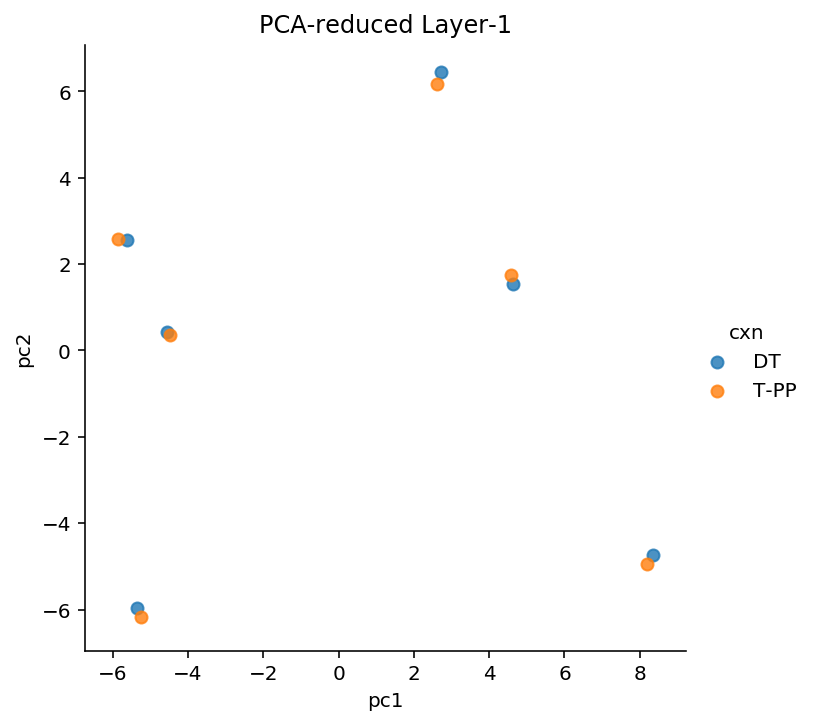

In [113]:
sns.lmplot(data = df_analysis,
          x = "l1_pc1",
          y = "l1_pc2",
          fit_reg=False,
          hue = "cxn")
plt.xlabel("pc1")
plt.ylabel("pc2")
plt.title("PCA-reduced Layer-1")


Text(0.5, 1.0, 'PCA-reduced Layer-2')

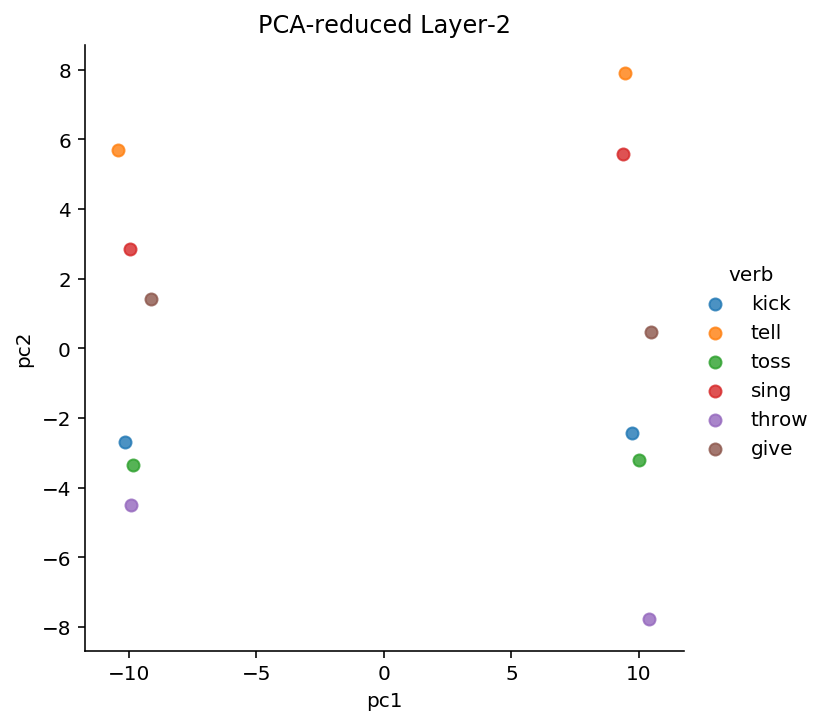

In [116]:
sns.lmplot(data = df_analysis,
          x = "l2_pc1",
          y = "l2_pc2",
          fit_reg=False,
          hue = "verb")
plt.xlabel("pc1")
plt.ylabel("pc2")
plt.title("PCA-reduced Layer-2")


Text(0.5, 1.0, 'PCA-reduced Layer-3')

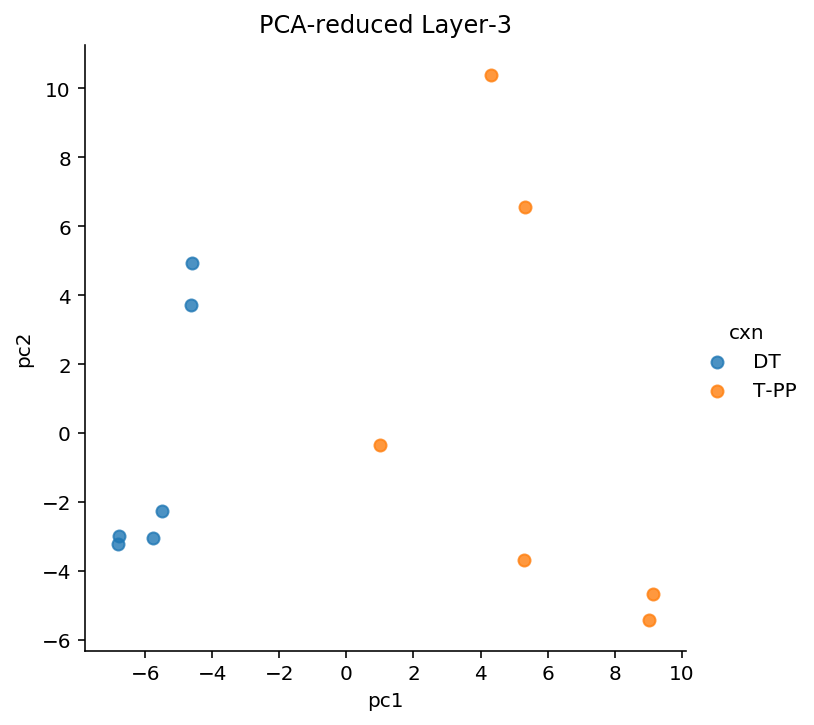

In [115]:
sns.lmplot(data = df_analysis,
          x = "l3_pc1",
          y = "l3_pc2",
          fit_reg=False,
          hue = "cxn")
plt.xlabel("pc1")
plt.ylabel("pc2")
plt.title("PCA-reduced Layer-3")
